In [49]:
import pandas as pd
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import seaborn as sns
import torch
import torch.nn.functional as F

In [50]:
%%javascript
var rate = 0;
// apply setting to  all current CodeMirror instances
IPython.notebook.get_cells().map(
    function(c) {  return c.code_mirror.options.cursorBlinkRate=rate;  }
);

// make sure new CodeMirror instance also use this setting
CodeMirror.defaults.cursorBlinkRate=rate;

<IPython.core.display.Javascript object>

In [51]:
df = pd.read_csv("data/train.csv")
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
df.isnull().sum().sum()

0

<AxesSubplot:xlabel='label', ylabel='count'>

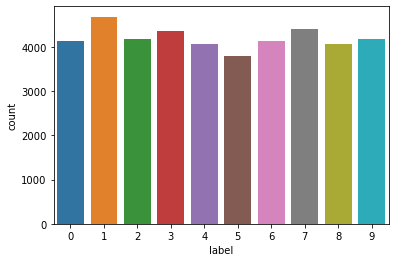

In [53]:
sns.countplot(data = df, x = "label")

In [83]:
class MNIST(Dataset):
    
    def __len__(self):
        return len(df)
    
    def __getitem__(self, idx):
        tensor, label = torch.tensor(df.loc[idx, df.columns != "label"].to_numpy()).view(1, 28, 28), df.loc[idx, "label"]
        return tensor, label
    
dataset = MNIST()
dataloader = DataLoader(dataset, batch_size = 64, shuffle = True)

In [84]:
class digitCNN(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.conv1 = nn.Conv2d(1, 6, 5, padding = 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        
        self.fc1 = nn.Linear(6 * 7 * 7, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.maxpool_2d(x)
        x = F.relu(self.conv2(x))
        x = F.maxpool_2d(x)
        
        x = x.view(-1, 6 * 7 * 7)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.log_softmax(x)
        
        return x
    

model = digitCNN()

In [85]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

In [86]:
epochs = 5
for epoch in range(epochs):
    for b, batch in enumerate(dataloader): # for each batch
        features, labels = batch
        
        # Zero the gradient
        optimizer.zero_grad()
        
        # Pass inputs to model
        predictions = model(features)
        
        # Get the loss
        loss = criterion(predictions, labels)
        
        # back propagate
        loss.backward()
        
        # optimize model parameters
        optimizer.step()
        
        print(f"batch n°{b}, loss is {loss.item()}")

RuntimeError: expected scalar type Long but found Float